---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia de Computação e Automação

DCA0133 - APRENDIZAGEM DE MÁQUINA E MINERAÇÃO DE DADOS 

Discentes: 

- Pedro Henrique Fonseca dos Santos
- Thiago Maia Souto


Título: **Resolução da Primeira Lista de Exercícios e Trabalhos**

---

## Questão 1

1. Um fabricante de computador usa chips de três fornecedores diferentes, aqui
denominados A, B e C, sendo 15% do fornecedor A, 45% do fornecedor B e 40% do
fornecedor C. Os chips dos fornecedores A, B e C apresentam taxas de defeitos dadas pelas
seguintes probabilidades respectivamente 0.001, 0.005 e 0.008. Se um chip é selecionado
aleatoriamente e visto ser defeituoso, determine com base no critério MAP (máxima
probabilidade a posteriori) qual foi o fabricante mais provável do chip defeituoso. 

### Inicializando variáveis e declarando função MAP

In [ ]:
from dataclasses import dataclass
from typing import List

@dataclass
class Fabricante:
  nome : str
  prob_prod : float
  prob_defeito : float

A = Fabricante('A', 0.15,  0.001)
B = Fabricante('B', 0.45, 0.005)
C = Fabricante('C', 0.40, 0.008)

lista_fabricantes = [A, B, C]

def MAP(fabricantes : List[Fabricante]) -> Fabricante:
  indice : int = 0
  posteriori : List[float] = []
  for fabricante in fabricantes:
    posteriori.append(fabricante.prob_prod*fabricante.prob_defeito)
  indice = posteriori.index(max(posteriori))
  return fabricantes[indice]



### Printando probabilidades de chips defeituosos de cada fábrica.

In [ ]:
print(f"A = {A.prob_prod*A.prob_defeito}")
print(f"B = {B.prob_prod*B.prob_defeito}")
print(f"C = {C.prob_prod*C.prob_defeito}")

A = 0.00015
B = 0.0022500000000000003
C = 0.0032


### Obtendo Fabricante com maior probabilidade de ter um chip defeituoso

In [ ]:
print(f" Fabricante mais provável com chip defeituoso = {MAP(lista_fabricantes)}")

 Fabricante mais provável com chip defeituoso = Fabricante(nome='C', prob_prod=0.4, prob_defeito=0.008)


## Questão 2

FIX : USAR CRITERIO MAP COM CLASSIFICADOR PROPRIO. SAÍDA INCORRETA, DEVERIA SER "SIM".

2. A tabela de dados abaixo ilustra a aplicação do método Naive-Bayes. Um determinado banco deve decidir se um cliente deve ou não receber empréstimo bancário em função da sua condição de bom ou mau pagador.
Considerando os dados de treinamento abaixo, aplique o classificador Naive-Bayes, para atribuir a classe (rótulo) para o registro 12:

### Criado DataFrame com os dados especificados

In [1]:
import pandas as pd


In [2]:
dados = {
      "tem_casa_propria" : ["sim", "nao", "nao", "sim", "nao", "nao", "sim", "nao", "nao", "nao", "sim", "nao"],
      "estado_civil" : ["solteiro", "casado", "solteiro", "casado", "divorciado", "casado", "divorciado", "solteiro", "casado", "solteiro", "divorciado", "divorciado"],
      "rendimentos" : ["alto", "medio", "baixo", "alto", "medio", "baixo","alto", "medio", "baixo", "medio", "medio", "alto"],
      "bom_pagador" : ["nao", "nao", "nao", "nao", "sim", "nao", "sim", "sim", "nao", "sim", "nao", "NA"]
      }
df = pd.DataFrame(dados)
print(df)


   tem_casa_propria estado_civil rendimentos bom_pagador
0               sim     solteiro        alto         nao
1               nao       casado       medio         nao
2               nao     solteiro       baixo         nao
3               sim       casado        alto         nao
4               nao   divorciado       medio         sim
5               nao       casado       baixo         nao
6               sim   divorciado        alto         sim
7               nao     solteiro       medio         sim
8               nao       casado       baixo         nao
9               nao     solteiro       medio         sim
10              sim   divorciado       medio         nao
11              nao   divorciado        alto          NA


### Fazendo Pre-processamento de dados

* Separando as colunas preditoras

In [3]:
X = df.iloc[:,:-1]
X

,tem_casa_propria,estado_civil,rendimentos
0,sim,solteiro,alto
1,nao,casado,medio
2,nao,solteiro,baixo
3,sim,casado,alto
4,nao,divorciado,medio
5,nao,casado,baixo
6,sim,divorciado,alto
7,nao,solteiro,medio
8,nao,casado,baixo
9,nao,solteiro,medio


* Separando coluna a ser predita

In [4]:
y = df.iloc[:,-1]
y

0     nao
1     nao
2     nao
3     nao
4     sim
5     nao
6     sim
7     sim
8     nao
9     sim
10    nao
11     NA
Name: bom_pagador, dtype: object

* Criando os encoders para as variáveis categóricas

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder_casa_propria = LabelEncoder()
encoder_estado_civil = LabelEncoder()
encoder_rendimentos = LabelEncoder()

* Atribuindo valores codificados para as colunas preditoras

In [6]:
X.iloc[:,0] = encoder_casa_propria.fit_transform(X.iloc[:,0])
X.iloc[:,1] = encoder_estado_civil.fit_transform(X.iloc[:,1])
X.iloc[:,2] = encoder_rendimentos.fit_transform(X.iloc[:,2])
X

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,tem_casa_propria,estado_civil,rendimentos
0,1,2,0
1,0,0,2
2,0,2,1
3,1,0,0
4,0,1,2
5,0,0,1
6,1,1,0
7,0,2,2
8,0,0,1
9,0,2,2


* Criando estimador naive bayes e fazendo o treinamento

In [7]:
from sklearn.naive_bayes import BernoulliNB

estimador = BernoulliNB()
estimador.fit(X.iloc[:-1].values, y.iloc[:-1].values)

BernoulliNB()

###  Gerando previsão usando o estimador criado

In [8]:
previsao = estimador.predict([X.iloc[-1].values])
previsao

array(['sim'], dtype='<U3')

Como pode ser visto acima, o modelo classificou o 12º registro como sendo um bom pagador, visto que foi classificado como 'sim' na coluna "Bom Pagador".

## Questão 3

3. Uma rede de crença (ou rede bayesiana), modela a relação entre as variáveis: oil (price of oil), inf (inflation) , eh (economy health), bp (British Petroleum Stock price), rt (retailer stock price). Cada variável tem dois estados (l:low) e (h:high), exceto a variável bp que tem adicionalmente o estado (n: normal). A rede de crença modela as variáveis de acordo com a tabela abaixo.

### Instalando as bibliotecas necessárias para criar a rede bayesiana e mostra-la graficamente.

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip  install pomegranate

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

Importando as bibliotecas necessárias para resolução do problema

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

### Inicializando a rede bayesiana a partir da distribuições de probabilidade e probabilidades condicionais

In [ ]:
eh = DiscreteDistribution({'l': 0.2, 'h': 0.8})

# eh oil
oil = ConditionalProbabilityTable([
      ['l', 'l', 0.9],
      ['l', 'h', 0.1],
      ['h', 'l', 0.05],
      ['h', 'h', 0.95]], [eh])

# oil bp
bp = ConditionalProbabilityTable([
      ['l', 'l', 0.9],
      ['l', 'n', 0.1],
      ['l', 'h', 0.0],
      ['h', 'l', 0.1],
      ['h', 'n', 0.4],
      ['h', 'h', 0.5]], [oil])

# eh oil inf
inf = ConditionalProbabilityTable([
      ['l', 'l', 'l', 0.9],
      ['l', 'l', 'h', 0.1],
      ['l', 'h', 'l', 0.1],
      ['l', 'h', 'h', 0.9],
      ['h', 'l', 'l', 0.1],
      ['h', 'l', 'h', 0.9],
      ['h', 'h', 'l', 0.01],
      ['h', 'h', 'h', 0.99]], [eh, oil])

# eh inf rt
rt  = ConditionalProbabilityTable([
      ['l', 'l', 'l', 0.9],
      ['l', 'l', 'h', 0.1],
      ['l', 'h', 'l', 0.1],
      ['l', 'h', 'h', 0.9],
      ['h', 'l', 'l', 0.1],
      ['h', 'l', 'h', 0.9],
      ['h', 'h', 'l', 0.01],
      ['h', 'h', 'h', 0.99]], [eh, inf])

Criando os nós da rede bayesiana 

In [ ]:
s1 = State(eh, name = "eh")
s2 = State(oil, name = "oil")
s3 = State(bp, name = "bp")
s4 = State(inf, name = "inf")
s5 = State(rt, name = "rt")

Criando o modelo da rede e adicionando os nós a ele

In [ ]:
modelo = BayesianNetwork("Questao 3")

modelo.add_states(s1, s2, s3, s4, s5)

Adicionando as arestas ao modelo 

In [ ]:
modelo.add_edge(s1,s2)
modelo.add_edge(s1,s4)
modelo.add_edge(s1,s5)

modelo.add_edge(s2,s3)
modelo.add_edge(s2,s4)

modelo.add_edge(s4,s5)

Produzindo o modelo da rede bayesiana

In [ ]:
modelo.bake()

### Plotagem do modelo da rede bayesiana criada

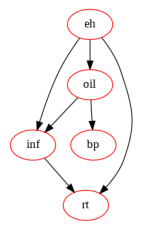

In [ ]:
modelo.plot()


Printando os valores correspondentes as distribuições de probabilidade da rede

In [ ]:
# eh oil bp inf rt
print(modelo.predict_proba({}))

[{
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "l" : 0.20000000000000068,
             "h" : 0.7999999999999994
         }
     ],
     "frozen" : false
 }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "l" : 0.2200000000000008,
             "h" : 0.7799999999999991
         }
     ],
     "frozen" : false
 }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "l" : 0.2760000000000006,
             "n" : 0.3339999999999998,
             "h" : 0.3899999999999996
         }
     ],
     "frozen" : false
 }
 {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "l" : 0.07904000000000065,
             "h" : 0.9209599999999994
         }


Obtendo as distribuições de probabilidade considerando os valores das variáveis aleatórias dadas por $bp = n$ e $rt = h$.

In [ ]:
modelo.predict_proba({"bp": 'n', 'rt':'h'})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "l" : 0.06782421218641359,
                   "h" : 0.9321757878135863
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "l" : 0.05851986824579289,
                   "h" : 0.9414801317542072
               }
           ],
           "frozen" : false
       }                                     , 'n',
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "l" : 0.021007546798329103,
                   "h" : 0.9789924532016708
               }
      

### Printando as probabilidades da variável $inf$ considerando os valores das variáveis aleatórias dadas por $bp = n$ e $rt = h$.

In [ ]:
print(modelo.predict_proba({"bp": 'n', 'rt':'h'})[3].parameters)

[{'l': 0.021007546798329103, 'h': 0.9789924532016708}]


Como pode ser visto acima, a probabilidade de $inf = h$ dado que $bp = n$ e $rt = h$ é de $0.9789$.

## Questão 4

4. Considere o problema de tomada de decisão caracterizado por uma sequência de eventos que podem ser apresentados por um grafo conhecido como árvore de decisão. O problema em questão consiste das escolhas e das decisões por parte de uma empresa de petróleo. Uma determinada empresa petrolífera obteve a concessão para explorar uma certa região. Os estudos anteriores (testes preliminares) estimam a probabilidade de existir petróleo nessa região em 0,20. A companhia pode optar por um novo teste, que custa 500.000,00 dólares, sendo que, se realmente existe petróleo, esse teste dirá com uma probabilidade de 0,80 que existe, e se realmente não existe, dirá com probabilidade 0,70 que não existe. Considerando que o custo de perfuração será de 3.000.000,00 dólares e que, se for encontrado petróleo, a companhia receberá 150.000.000,00 dólares. Considere, portanto os seguintes eventos e os seus complementos:
* **(i)** Evento T (a companhia faz o teste);
* **(ii)** Evento F (o teste é favorável à existência de petróleo;
* **(iii)** Evento P (a companhia perfura o poço); 
* **(iv)** Evento E (existe petróleo).

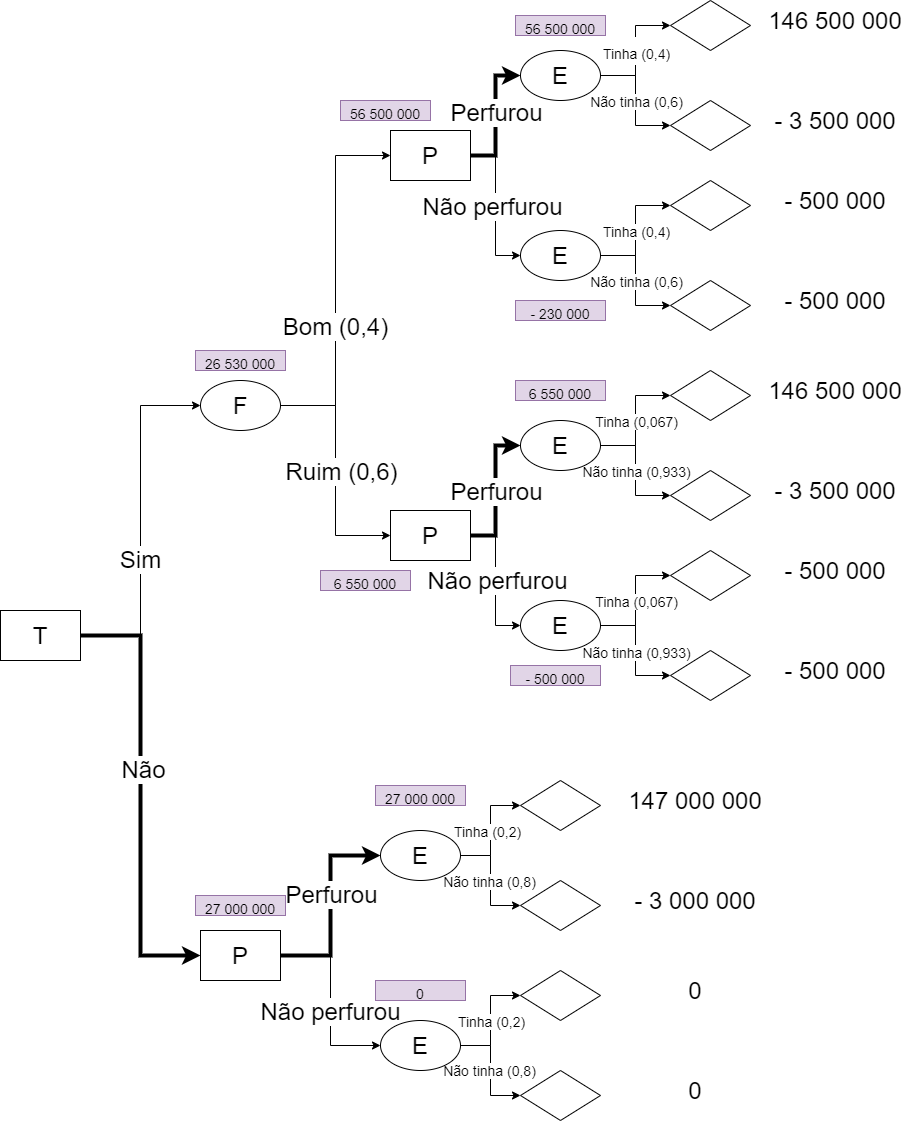

Como pode ser visto na imagem acima, a melhor decisão utilizando a utilidade máxima esperada é não realizar o teste e fazer a perfuração. Além disso, o valor esperado do lucro da companhia quando tomada a melhor decisão é de U$ 147.000.000,00.

Por fim, um algoritmo para solução do problema é o seguinte:
* 1. Começando com os Nós que possuem apenas folhas (nós de utilidade) como filhos.
* 2. Se o nó $X$ é um nó de chance, cada aresta de saída possui uma probabilidade e cada filho possui uma utilidade associada. Para o cálculo da utilidade esperada utiliza-se a expressão abaixo:
$$EU(X) = \sum_{C \in Children(X)} U(C) \times P(C)$$
  Se o nó for um nó de decisão, cada filho possui uma utilidade ou utilidade esperada anexada. Escolhe-se a decisão cuja filha possui a máxima utilidade esperada e 

$$EU(X) = max_{C \in Children(X)}(EU(C))$$

* 3. Repete-se recursivamente a cada nível da árvore, usando a utilidade esperada calculada para cada filho.

* 4. O valor para o nó raiz é a utilidade máxima esperada obtida se a utilidade esperada é maximizada a cada decisão.

## Questão 5

5. Considere os dados apresentados na tabela abaixo. Assumindo que as distribuições associadas a cada classe são gaussianas com probabilidades a priori dadas por (P(ω1) =P(ω2) = 1/4 e P(ω3) = 1/2) busque solucionar as questões abaixo.

* a. Estime o vetores média e a matriz de covariância de cada distribuição gaussiana multivariada. Para estimativa dos vetores média e das matrizes utilize os estimadores de máxima verossimilhança dados abaixo.

  * Estimador de média: 
  $$\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_i $$

  * Estimador dos elementos das matrizes de covariância
  $$S_{ij} = \frac{\sum_{l = 1}^{N}(x_{il} - \hat{\mu_i})(x_{jl} - \hat{\mu_j})}{N -1}$$

* b. Calcule as funções discriminantes $g_i(\textbf{x}) = \ln{p(\textbf{x}|\omega_i)} + \ln{P(\omega_i)}$, $i=1,2,3$, considerando que $p(\textbf{x}|\omega_i) \sim N(\mathbf{\mu} i, \mathbf{\Sigma} i)$ são distribuições normais multivariadas. As funções discriminantes podem ser calculadas pela equação abaixo. 
$$g_i(\mathbf{x}) = -\frac{1}{2}((\mathbf{x} - \mathbf{\mu_i})^t\mathbf{\Sigma_i}^{-1}(\mathbf{x} - \mathbf{\mu_i})+ \ln{|\mathbf{\Sigma_i}|} + \ln{P(\omega_i)})$$

### Inicializando variaveis

Inicializando variáveis com os dados obtidos a partir da tabela dada.

In [ ]:
w1 = { "x1" : [-5.01, -5.43,  1.08,  0.86, -2.67, 4.94, -2.51, -2.25,  5.56, 1.03],
       "x2" : [-8.12, -3.48, -5.52, -3.78,  0.63, 3.29,  2.09, -2.13,  2.86, -3.33],
       "x3" : [-3.68, -3.54,  1.66, -4.11,  7.39, 2.08, -2.59, -6.94, -2.26, 4.33] }

w2 = { "x1" : [-0.91,  1.30, -7.75, -5.47, 6.14, 3.60,  5.37,  7.18, -7.39, -7.50],
       "x2" : [-0.18, -2.06, -4.54,  0.50, 5.72, 1.26, -4.63,  1.46,  1.17, -6.32],
       "x3" : [-0.05, -3.53, -0.95,  3.92, -4.85, 4.36, -3.65, -6.66,  6.30, -0.31]}

w3 = { "x1": [5.35, 5.12, -1.34, 4.48, 7.11, 7.17, 5.75, 0.77,  0.90,  3.52],
       "x2": [2.26, 3.22, -5.31, 3.42, 2.39, 4.33, 3.97, 0.27, -0.43, -0.36],
       "x3": [8.16, -2.66, -9.87, 5.19, 9.21, -0.98, 6.65, 2.41, -8.71, 6.43]}


Inicializando probabilidades a priori $P(\omega_1)$, $P(\omega_2)$ e $P(\omega_3)$

In [ ]:
Pw1 = 1/4
Pw2 = 1/4
Pw3 = 1/2

Importando biblioteca utilizada para facilitar o tratamento dos dados

In [ ]:
import pandas as pd
import numpy as np

Convertendo os dicionários w1, w2 e w3 para dataframes

In [ ]:
dfw1 = pd.DataFrame(w1)
dfw2 = pd.DataFrame(w2)
dfw3 = pd.DataFrame(w3)
dfw1.head()

,x1,x2,x3
0,-5.01,-8.12,-3.68
1,-5.43,-3.48,-3.54
2,1.08,-5.52,1.66
3,0.86,-3.78,-4.11
4,-2.67,0.63,7.39


Criando função para estimar o vetor média do dataframe

In [ ]:
def estima_media(df : pd.DataFrame) -> np.array:
  media = df[['x1', 'x2', 'x3']].mean().values
  return media

Testando função de estimação da média

In [ ]:
estima_media(dfw1)

array([-0.44 , -1.749, -0.766])

Criando função para estimar matriz de covariancia

In [ ]:
def estima_covariancia(df: pd.DataFrame) -> np.array:
  return df.cov().values


Testando função que estima a matriz de covariancia

In [ ]:
cov = estima_covariancia(dfw1)
cov

array([[14.38051111,  7.69537778,  4.12232222],
       [ 7.69537778, 14.62312111,  3.90684   ],
       [ 4.12232222,  3.90684   , 19.72453778]])

### Estimando os vetores de média para cada $\omega_i$

In [ ]:
media1 = estima_media(dfw1)
media2 = estima_media(dfw2)
media3 = estima_media(dfw3)
media2

array([-0.543, -0.762, -0.542])

### Estimando matriz de covariancia para cada $\omega_i$

In [ ]:
cov1 = estima_covariancia(dfw1)
cov2 = estima_covariancia(dfw2)
cov3 = estima_covariancia(dfw3)
cov2

array([[ 36.82933444,   9.98092667, -16.36675111],
       [  9.98092667,  13.16855111,   0.40905111],
       [-16.36675111,   0.40905111,  18.42121778]])

Definindo função para testar se as matrizes de covariancia estimadas são positivas semidefinidas

In [ ]:
def is_pos_sdef(x):
    return np.all(np.linalg.eigvals(x) >= 0)

Verificando se todas as matrizes de covariâncias são positivas semidefinidas

In [ ]:
covs = [cov1, cov2, cov3]
print(all(list(map(is_pos_sdef, covs))))

True


### Calculando função discriminante $g_i(\mathbf{x})$

Definindo função para cálculo da função discriminante

In [ ]:
from numpy.linalg import inv, det

In [ ]:
def discriminante(x: np.array, media : np.array, cov : np.array, prior: float) -> np.array:
  g = -0.5*((x-media)@inv(cov)@(x-media).transpose() + np.log(det(cov))) + np.log(prior)
  return g

### Inicializando pontos para realização dos cálculos

In [ ]:
from dataclasses import dataclass

@dataclass
class Ponto:
  nome : str
  valores : np.array
  label : str

p1 = Ponto('1', np.array([1,2,1]), 'label')
p2 = Ponto('2', np.array([5,3,2]), 'label')
p3 = Ponto('3', np.array([0,0,0]), 'label')
p4 = Ponto('4', np.array([1,0,0]), 'label')

Definindo função para classificar um determinado ponto

In [ ]:
def classificador(x : Ponto) -> Ponto:
  classes = [(media1, cov1, Pw1), (media2, cov2, Pw2), (media3, cov3, Pw3)]
  maior = 1000

  for wi, (media, cov, Pw) in enumerate(classes):
    discriminador = np.abs(discriminante(x.valores, media, cov,Pw))
    if maior > discriminador:
      maior = discriminador
      x.label = str(wi + 1)
  
  return x

### Classificando os pontos

In [ ]:
print(f"Ponto 1 = {classificador(p1)}")
print(f"Ponto 2 = {classificador(p2)}")
print(f"Ponto 3 = {classificador(p3)}")
print(f"Ponto 4 = {classificador(p4)}")

Ponto 1 = Ponto(nome='1', valores=array([1, 2, 1]), label='2')
Ponto 2 = Ponto(nome='2', valores=array([5, 3, 2]), label='3')
Ponto 3 = Ponto(nome='3', valores=array([0, 0, 0]), label='1')
Ponto 4 = Ponto(nome='4', valores=array([1, 0, 0]), label='3')


Verificando se a classificação foi feita corretamente

In [ ]:
ponto1 = [
          discriminante(p1.valores, media1, cov1, Pw1),
          discriminante(p1.valores, media2, cov2, Pw2),
          discriminante(p1.valores, media3, cov3, Pw3)]
ponto2 = [
          discriminante(p2.valores, media1, cov1, Pw1),
          discriminante(p2.valores, media2, cov2, Pw2),
          discriminante(p2.valores, media3, cov3, Pw3)]
ponto3 = [
          discriminante(p3.valores, media1, cov1, Pw1),
          discriminante(p3.valores, media2, cov2, Pw2),
          discriminante(p3.valores, media3, cov3, Pw3)]
ponto4 = [
          discriminante(p4.valores, media1, cov1, Pw1),
          discriminante(p4.valores, media2, cov2, Pw2),
          discriminante(p4.valores, media3, cov3, Pw3)]

print("------------------Ponto 1-----------------------")
print(f"{ponto1}")
print(f"label = {ponto1.index(max(ponto1)) + 1}")
print("------------------Ponto 2-----------------------")
print(f"{ponto2}")
print(f"label = {ponto2.index(max(ponto2)) + 1}")
print("------------------Ponto 3-----------------------")
print(f"{ponto3}")
print(f"label = {ponto3.index(max(ponto3)) + 1}")
print("------------------Ponto 4-----------------------")
print(f"{ponto4}")
print(f"label = {ponto4.index(max(ponto4)) + 1}")

------------------Ponto 1-----------------------
[-5.862805965817531, -5.824828056014898, -7.283994468894953]
label = 2
------------------Ponto 2-----------------------
[-6.5600629889557185, -6.9979094692806285, -3.9164470060029344]
label = 3
------------------Ponto 3-----------------------
[-5.467754440980711, -5.492730108704212, -6.218884712751176]
label = 1
------------------Ponto 4-----------------------
[-5.466423114380223, -5.5587792699179985, -4.775991815227847]
label = 3


## Questão 6

6. Apresente um estudo sobre os seguintes tópicos abaixo:

a) Medidas de desempenho de classificadores ( Acurácia, Precisão, F-Score, ....)

b) Cálculo de distancias (Distancia Euclidiana, Distancia de Mahalanobis,
Distancia City Block, ...)

a) As métricas utilizadas para verificar a performance do modelo foram as seguintes:

**Acurácia de validação:** É razão entre a quantidade de classificações das amostras corretas e a quantidade total de amostras do conjunto de validação. A acurácia em si só é uma boa métrica do desempenho do modelo quando são usados datasets simétricos nos quais os valores de falsos positivos e falsos negativos são muito próximos.

**Precisão:** É a razão entre a quantidade de amostras classificadas como positiva corretamente e o número total de amostras classificadas como positivas. Intuitivamente, a precisão está relacionada com a capacidade do modelo não classificar uma amostra como positiva quando ela na verdade for negativa. Seu melhor valor é 1 e o pior é 0.

**Recall (Sensibilidade):** É a razão entre a quantidade de amostras classificadas como positiva corretamente e a quantidade total de amostras na classe. Intuitivamente essa métrica está relacionada com a habilidade do modelo de classificar corretamente todas as amostras positivas. Seu melhor valor é 1 e o pior é 0.

**F1:** A métrica F1 pode ser interpretada como a média ponderada da precisão e da recall. O melhor valor assumido por essa métrica é 1 e o pior é 0.
Matriz de confusão: É definida como sendo uma matriz C, na qual o valor C(i,j) é igual ao número de amostras que são da classe ‘i’ mas foram classificados como sendo da classe ‘j’.

b) Os cálculos de distância utilizados em modelos de aprendizado de máquina são:

**Distância euclidiana:** É a distância entre dois pontos, sendo provada pela aplicação do teorema de pitágoras. É a métrica de distância mais antiga, porém no contexto de aprendizado de máquina, utilizada só para atributos contínuos.

**Distância de Mahalanobis:** Essa distância leva em consideração as variações estatísticas dos pontos. Por exemplo, se x e y são dois vetores da mesma distribuição, com matriz de covariância C, a distância é dada pela equação:
$d = \sqrt{(x-y)^T \cdot C^{-1} \cdot (x-y)}$.

**Distancia City Block:** Ou distância de Manhattan (ou Geometria do táxi) é uma forma de geometria em que a usual métrica da geometria euclidiana é substituída por uma nova métrica em que a distância entre dois pontos é a soma das diferenças absolutas de suas coordenadas. É conhecida também como distância L, pois ao se mover em diagonal, é necessário andar no formato de Ls.

**Distância de Minkowski:** É uma métrica em um
espaço vetorial normado, a qual pode ser
considerada como uma generalização de ambas as
distâncias euclidiana e Manhattan, já que a diferença entre ambas equações é a raiz quadrada.

**Distância de Levenshtein:** Ou distância de edição entre duas cadeias de caracteres é definida como o número mínimo de operações de edição necessárias para transformar a primeira cadeia de caracteres na segunda. Por exemplo, a distância de Levenshtein entre "Pedro" e "Pedras" é 2, pois é necessário substituir o "o" por "a" e depois adicionar o "s".

## Trabalho 1

Implemente o algoritmo do classificador Naive-Bayes ou utilize um software já disponível. A linguagem de programação é de livre escolha. Utilize o algoritmo implementado para detecção de Spam em mensagens de email ou para classificar páginas de texto como interessante ou não interessante com base em um tema de interesse presente nas palavras que aparecem nas páginas.

Utilizaremos o algoritmo Naïve Bayes presente na biblioteca Scikit Learn para desenvolver um filtro de Spam em mensagens de e-mail. O dataset utilizado para treinar está presente no kaggle.

[Link](https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [ ]:
emails = pd.read_csv('spam_or_not_spam.csv')
emails.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
emails['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

É possível ver que o dataset tem duas colunas, uma contendo o e-mail e outra contendo um label, com valor inteiro, indicando se é spam quando for 1 ou não spam quando for 0.

No entanto, podemos ver que a quantidade de spams é muito menor que a quantidade de não spams. Para que o modelo não seja tendencioso, iremos utilizar uma quantidade de valores iguais para os dois labels.

### Pré-processamento

É necessário realizar o pré-processamento antes de treinar o modelo. Na função a seguir, separaremos as palavras criando um dicionário.

In [ ]:
def dictionary_words(df:pd.DataFrame, column:str) -> dict:
  """ This funtion get the all words and store in a dict

  Args:
    df (pandas DataFrame): A dataframe with words or texts
    column (str): Name of column

  Return:
    dictionary (dict): A dictionary with all words
  """
  split_words = df.dropna(subset=[column])[column].str.lower().str.split()
  set_word = set()

  for word in split_words:
    try:
      set_word.update(word)
    except:
      print(word)
    
  len_words = len(set_word)


  dictionary = dict(zip(set_word, range(len_words)))

  return dictionary


Com o dicionário feito, iremos separar as palavras do email e criar um vetor do tamanho do dicionário. Cada palavra que aparecer, será marcada no vetor.

In [ ]:
def vectorize_words(text:str, dictionary:dict) -> list:
    """ This function create a list with the frequency than the words appears
    in the email text

    Args:
        text (str): A text with words
        dictionary (dict): A dict with all words

    Return:
        vector (list): A list with the frequency than the word appears.
    """
    vector = [0] * len(dictionary)
    for word in text:
        if word in dictionary:
            position = dictionary[word]
            vector[position] += 1
    return vector

def generate_array(dictionary:dict, df:pd.DataFrame, column):
  """ This function generate a array with vector of every text.
  For it, it calls the functions than we saw previously

  Args: 
    dictionary (dict): A dict with all words
    df (pandas DataFrame): A dataframe with words or texts
    column (str): Name of column

  Return:
    text_vector (list): An array where every text will be a vector with the
    number of appears
  """
  split_words = df.dropna(subset=[column])[column].str.lower().str.split()
  
  text_vector = [vectorize_words(text, dictionary) for text in split_words]
  return text_vector


Agora iremos criar o dicionário, o vetor, embaralhar as amostras, torná-las iguais e concatenar.

In [ ]:
dictionary = dictionary_words(emails, 'email')

emails = emails.sample(frac=1, random_state=1)

email_ok = emails.loc[emails.label == 0][:500]
email_spam = emails.loc[emails.label == 1]

emails = pd.concat([email_ok ,email_spam])

emails['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

Agora podemos criar o modelo, treiná-lo e testá-lo.

In [ ]:
## vetor de palavras virando array numpy
X = np.array(generate_array(dictionary, emails, 'email'))

## retirando valores nulos
Y = emails.dropna().values[:, 1]

## transformando Y em inteiro
Y = Y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state= 1, test_size = 0.3)

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)
predicts = NaiveBayes.predict(X_test)
accuracy_score(y_test, predicts)

0.9266666666666666

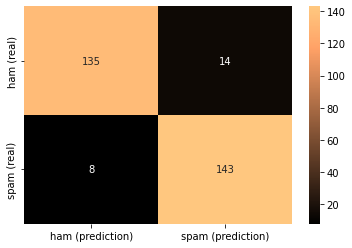

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicts), annot=True, fmt="g", cmap=plt.cm.copper, 
            xticklabels=['ham (prediction)', 'spam (prediction)'], 
            yticklabels=['ham (real)', 'spam (real)']);

## Trabalho 2

Criação de uma rede bayesiana para determinar se irá chover no dia posterior a partir das variáveis "Humidade as 9h do dia anterior", "Humidade as 15h do dia anterior" e "Velocidade do vento média no dia anterior" 

Link do dataset utilizado
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/tasks

### Configurando as bibliotecas

In [1]:
!pip install networkx
!pip install pybbn

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39726 sha256=84c9f8b43d8eaf7e1aa9a347ba95b42fb41f51693a3d1f11b34396679572d2db
  Stored in directory: /root/.cache/pip/wheels/a8/64/55/b52530d41fe7c9ae501ddd7c06f3122ceb5f15921680f0371b
Successfully built pybbn


Importando as biblitoecas necessárias

In [3]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

### Pré Processamento

Importando o dataframe

In [4]:
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

Mostrando algumas das linhas do dataframe importado

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Mostrando as colunas do dataframe

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Excluindo os registros cuja coluna "RainTomorrow" estão faltando

In [7]:
df=df[pd.isnull(df['RainTomorrow'])==False]

Para as demais colunas cujos dados estão faltando é realizada a imputação a partir da média de cada coluna correspondente

In [8]:
df=df.fillna(df.mean())

### Engenharia de características

Criando nova coluna "WindGustSpeedCat" a partir da classificação dos valores da coluna "WindGustSpeed" nas categorias "0 < x <= 40", "40 < x <= 50", "x > 50"

In [9]:
df['WindGustSpeedCat']=df['WindGustSpeed'].apply(lambda x: '0.<=40'   if x<=40 else
                                                            '1.40-50' if 40<x<=50 else '2.>50')

Criando nova coluna "Humidity9amCat" a partir da classificação dos valores da coluna "Humidity9am" nas categorias "x > 60" e "x < 60"

In [10]:
df['Humidity9amCat']=df['Humidity9am'].apply(lambda x: '1.>60' if x>60 else '0.<=60')

Criando nova coluna "Humidity3pmCat" a partir da classificação dos valores da coluna "Humidity3pm" nas categorias "x > 60" e "x < 60"

In [11]:
df['Humidity3pmCat']=df['Humidity3pm'].apply(lambda x: '1.>60' if x>60 else '0.<=60')

Mostrando algumas linhas do novo dataframe

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustSpeedCat,Humidity9amCat,Humidity3pmCat
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,1.40-50,1.>60,0.<=60
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,1.40-50,0.<=60,0.<=60
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,1.40-50,0.<=60,0.<=60
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0.<=40,0.<=60,0.<=60
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,1.40-50,1.>60,0.<=60


### Criando a rede bayesiana para o problema

Definindo função utilizada para o cálculo das probabildiades de cada coluna que compões os nós da rede bayesiana

In [13]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

Criando os nós da rede a partir dos dados das colunas "Humidity9amCat", "Humidity3pmCat" e "WindGustSpeedCat" e suas probabilidades e as respectivas conexões da rede

In [14]:
# Create nodes by using our earlier function to automatically calculate probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), probs(df, child='Humidity9amCat'))
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), probs(df, child='Humidity3pmCat', parent1='Humidity9amCat'))
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), probs(df, child='WindGustSpeedCat'))
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat'))

# Create Network
bbn = Bbn() \
    .add_node(H9am) \
    .add_node(H3pm) \
    .add_node(W) \
    .add_node(RT) \
    .add_edge(Edge(H9am, H3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(H3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

Configurando posições e opções para a plotagem da rede bayesiana

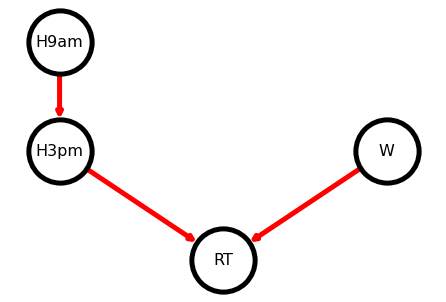

In [15]:
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

Definindo função responsável por printar as probabilidades marginais da rede

In [16]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.67124
1=>60|0.32876
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.30658
0=>60|0.69342
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.77655
3=Yes|0.22345
----------------


Definindo função responsável por adicionar novas evidências a rede para o cálculo das novas distribuições de probabilidade

In [17]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'H9am', '>60', 1.0)

# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.55760
1=>60|0.44240
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.73833
3=Yes|0.26167
----------------


Adicionando as evidências e calculando as novas probabilidades

In [18]:
# Add more evidence
evidence('ev1', 'H3pm', '>60', 1.0)
evidence('ev2', 'W', '>50', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.00000
1=>60|1.00000
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.00000
2=40-50|0.00000
2=>50|1.00000
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.32182
3=Yes|0.67818
----------------
